**IMPORTANT LINKS**

https://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

https://towardsdatascience.com/boosting-the-accuracy-of-your-machine-learning-models-f878d6a2d185

https://nbviewer.jupyter.org/github/arundhaj/datamining_class/blob/master/decision_tree.ipynb

https://medium.com/@julie.yin/understanding-the-data-splitting-functions-in-scikit-learn-9ae4046fbd26

https://ritchieng.com/machine-learning-evaluate-classification-model/

https://quantdev.ssri.psu.edu/sites/qdev/files/09_EnsembleMethods_2017_1127.html

http://web.cs.ucla.edu/~yzsun/classes/2014Fall_CS6220/Slides/04Matrix_Data_Classification_1.pdf

https://analyticstraining.com/sensitivity-vs-specificity-in-logistic-regression/

https://github.com/scikit-learn/scikit-learn/issues/11104

https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/

https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf

https://adataanalyst.com/scikit-learn/decision-trees-scikit-learn/

https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159

In [30]:

#Importing models.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier          # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split     # Import train_test_split function
from sklearn import metrics                              #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_predict, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import recall_score, make_scorer

#imr = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)

#Uploading data 

file = 'normal.xlsx'
file1 = 'torsion.xlsx'
normal = pd.read_excel(file)
torsion= pd.read_excel(file1)
result = []
normal = normal.rename(columns={'Mass': 'Mass/cyst'})
torsion = torsion.rename(columns={'Mass': 'Mass/cyst'})

In [31]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

,Free_Fluid
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
423,1.0
424,1.0
425,1.0
426,1.0


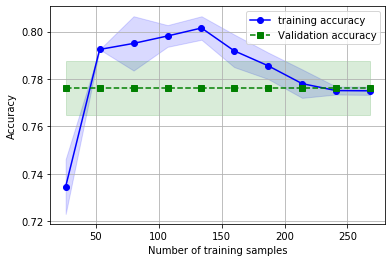

In [32]:
#Single feature classification
#Importing the data for free_fluid
m = []

m.append('Free_Fluid')
feature_cols = ['Free_Fluid', 'label']
x_free_normal = normal[feature_cols]
x_free_torsed = torsion[feature_cols]

# Removing NaN
x_free_normal = x_free_normal.dropna()
x_free_torsed = x_free_torsed.dropna()


#Concatinating variables

x = pd.concat([x_free_normal, x_free_torsed], ignore_index=True)


#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)

# Train Decision Tree Classifer

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test )


scores = cross_val_score(clf, x_test,y_test, cv=10)
scores_1= cross_val_score(clf, x_train,y_train, cv=10)
confusion = (metrics.confusion_matrix(y_test, y_pred))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sen = round(TP / float(FN + TP), 2)

spec = round(TN / (TN + FP), 2)


n = round(scores.mean(), 2), '+/-', round(scores.std(), 2)
n_1 = round(scores_1.mean(), 2), '+/-', round(scores_1.std(), 2)

auc_score = cross_val_score(clf, x_test, y_test, cv=10, scoring='roc_auc')
sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')

auc_mean = round(auc_score.mean(), 2), '+/-', round(auc_score.std(), 2)
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

m.append(n)
m.append(n_1)
m.append(auc_mean)
m.append(sens)
m.append(sen)
m.append(spec)
result.append(m)

train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 10)
train_mean= np.mean(train_scores, axis = 1)
train_std= np.std(train_scores, axis = 1)
test_mean= np.mean(test_scores, axis = 1)
test_std= np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean,color = 'blue', marker = 'o', label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker ='s', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper right')
result

AUC: 0.8284313725490196


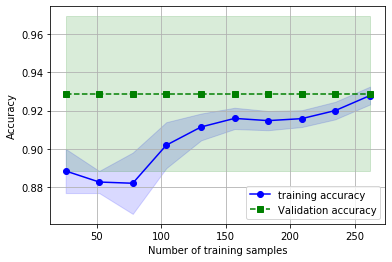

In [33]:
# Uploading flow data
m = []

m.append('Flow')
feature_cols = ['Flow', 'label']
x_free_normal = normal[feature_cols]
x_free_torsed = torsion[feature_cols]

# Removing NAN:
x_free_normal = x_free_normal.dropna()
x_free_torsed = x_free_torsed.dropna()

#Concatinating variables

x = pd.concat([x_free_normal, x_free_torsed], ignore_index=True)

#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

# Train Decision Tree Classifer

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

fpr,tpr, thresholds = metrics.roc_curve(y_test, y_pred);
print("AUC:", metrics.auc(fpr,tpr))

scores = cross_val_score(clf, x_test,y_test, cv=10)
scores_1= cross_val_score(clf, x_train,y_train, cv=10)
confusion = (metrics.confusion_matrix(y_test, y_pred))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sen = round(TP / float(FN + TP), 2)

spec = round(TN / (TN + FP), 2)


n = round(scores.mean(), 2), '+/-', round(scores.std(), 2)
n_1 = round(scores_1.mean(), 2), '+/-', round(scores_1.std(), 2)

auc_score = cross_val_score(clf, x_test, y_test, cv=10, scoring='roc_auc')
sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')

auc_mean = round(auc_score.mean(), 2), '+/-', round(auc_score.std(), 2)
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

m.append(n)
m.append(n_1)
m.append(auc_mean)
m.append(sens)
m.append(sen)
m.append(spec)
result.append(m)

train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 10)
train_mean= np.mean(train_scores, axis = 1)
train_std= np.std(train_scores, axis = 1)
test_mean= np.mean(test_scores, axis = 1)
test_std= np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean,color = 'blue', marker = 'o', label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker ='s', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')


sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

AUC: 0.7608932461873639


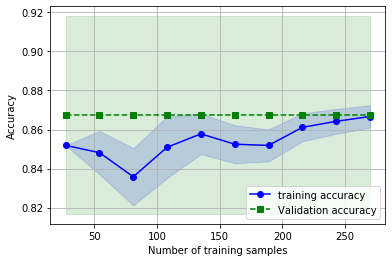

In [34]:
# Uploading Mass/Cyst

m = []
m.append('Mass/cyst')

feature_cols = ['Mass/cyst', 'label']
x_free_normal = normal[feature_cols]
x_free_torsed = torsion[feature_cols]

# Removing NAN:
x_free_normal = x_free_normal.dropna()
x_free_torsed = x_free_torsed.dropna()

#Concatinating variables

x = pd.concat([x_free_normal, x_free_torsed], ignore_index=True)

#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

# Train Decision Tree Classifer

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

fpr,tpr, thresholds = metrics.roc_curve(y_test, y_pred);
print("AUC:", metrics.auc(fpr,tpr))

scores = cross_val_score(clf, x_test,y_test, cv=10)
scores_1= cross_val_score(clf, x_train,y_train, cv=10)

confusion = (metrics.confusion_matrix(y_test, y_pred))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sen = round(TP / float(FN + TP), 2)

spec = round(TN / (TN + FP), 2)


n = round(scores.mean(), 2), '+/-', round(scores.std(), 2)
n_1 = round(scores_1.mean(), 2), '+/-', round(scores_1.std(), 2)

auc_score = cross_val_score(clf, x_test, y_test, cv=10, scoring='roc_auc')
sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')

auc_mean = round(auc_score.mean(), 2), '+/-', round(auc_score.std(), 2)
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

m.append(n)
m.append(n_1)
m.append(auc_mean)
m.append(sens)
m.append(sen)
m.append(spec)
result.append(m)

train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 10)
train_mean= np.mean(train_scores, axis = 1)
train_std= np.std(train_scores, axis = 1)
test_mean= np.mean(test_scores, axis = 1)
test_std= np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean,color = 'blue', marker = 'o', label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker ='s', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

AUC: 0.7207044107965768


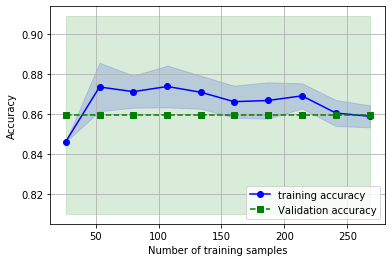

In [35]:
# Uploading Peripheral follicles

m = []
m.append('Periph_follicles')


feature_cols = ['Periph_follicles', 'label']
x_free_normal = normal[feature_cols]
x_free_torsed = torsion[feature_cols]

# Removing NAN:
x_free_normal = x_free_normal.dropna()
x_free_torsed = x_free_torsed.dropna()

#Concatinating variables

x = pd.concat([x_free_normal, x_free_torsed], ignore_index=True)

#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

# Train Decision Tree Classifer

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

fpr,tpr, thresholds = metrics.roc_curve(y_test, y_pred);
print("AUC:", metrics.auc(fpr,tpr))

scores = cross_val_score(clf, x_test,y_test, cv=10)
scores_1 = cross_val_score(clf, x_train,y_train, cv=10)

confusion = (metrics.confusion_matrix(y_test, y_pred))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sen = round(TP / float(FN + TP), 2)

spec = round(TN / (TN + FP), 2)


n = round(scores.mean(), 2), '+/-', round(scores.std(), 2)
n_1 = round(scores_1.mean(), 2), '+/-', round(scores_1.std(), 2)

auc_score = cross_val_score(clf, x_test, y_test, cv=10, scoring='roc_auc')
sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')

auc_mean = round(auc_score.mean(), 2), '+/-', round(auc_score.std(), 2)
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

m.append(n)
m.append(n_1)
m.append(auc_mean)
m.append(sens)
m.append(sen)
m.append(spec)
result.append(m)

train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 10)
train_mean= np.mean(train_scores, axis = 1)
train_std= np.std(train_scores, axis = 1)
test_mean= np.mean(test_scores, axis = 1)
test_std= np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean,color = 'blue', marker = 'o', label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker ='s', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

AUC: 0.7864923747276688


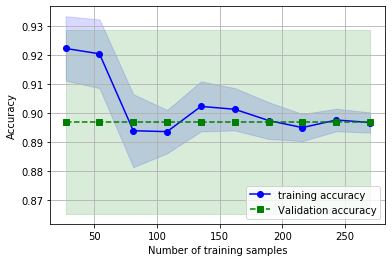

In [36]:
# Uploading Medialized

m = []
m.append('Medialized')

feature_cols = ['Medialized', 'label']
x_free_normal = normal[feature_cols]
x_free_torsed = torsion[feature_cols]

# Removing NAN:
x_free_normal = x_free_normal.dropna()
x_free_torsed = x_free_torsed.dropna()

#Concatinating variables

x = pd.concat([x_free_normal, x_free_torsed], ignore_index=True)

#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

# Train Decision Tree Classifer

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

fpr,tpr, thresholds = metrics.roc_curve(y_test, y_pred);
print("AUC:", metrics.auc(fpr,tpr))

scores = cross_val_score(clf, x_test,y_test, cv=10)
scores_1= cross_val_score(clf, x_train,y_train, cv=10)


confusion = (metrics.confusion_matrix(y_test, y_pred))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sen = round(TP / float(FN + TP), 2)

spec = round(TN / (TN + FP), 2)


n = round(scores.mean(), 2), '+/-', round(scores.std(), 2)
n_1 = round(scores_1.mean(), 2), '+/-', round(scores_1.std(), 2)

auc_score = cross_val_score(clf, x_test, y_test, cv=10, scoring='roc_auc')
sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')

auc_mean = round(auc_score.mean(), 2), '+/-', round(auc_score.std(), 2)
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

m.append(n)
m.append(n_1)
m.append(auc_mean)
m.append(sens)
m.append(sen)
m.append(spec)
result.append(m)

train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 10)
train_mean= np.mean(train_scores, axis = 1)
train_std= np.std(train_scores, axis = 1)
test_mean= np.mean(test_scores, axis = 1)
test_std= np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean,color = 'blue', marker = 'o', label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker ='s', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

AUC: 0.8545751633986929


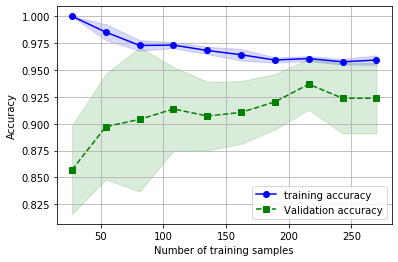

In [37]:
# Uploading volume both for normal and torsed
m = []
m.append('Vol')

feature_cols = ['Vol', 'label']
x_normal = normal[feature_cols]
x_torsed = torsion[feature_cols]

# Removing NAN:
x_normal = x_normal.dropna()
x_torsed = x_torsed.dropna()


#Concatinating variables

x = pd.concat([x_normal, x_torsed], ignore_index=True)


#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

# Train Decision Tree Classifer

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

fpr,tpr, thresholds = metrics.roc_curve(y_test, y_pred);
print("AUC:", metrics.auc(fpr,tpr))

scores = cross_val_score(clf, x_test,y_test, cv=10)
scores_1= cross_val_score(clf, x_train,y_train, cv=10)

confusion = (metrics.confusion_matrix(y_test, y_pred))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sen = round(TP / float(FN + TP), 2)

spec = round(TN / (TN + FP), 2)


n = round(scores.mean(), 2), '+/-', round(scores.std(), 2)
n_1 = round(scores_1.mean(), 2), '+/-', round(scores_1.std(), 2)

auc_score = cross_val_score(clf, x_test, y_test, cv=10, scoring='roc_auc')
sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')

auc_mean = round(auc_score.mean(), 2), '+/-', round(auc_score.std(), 2)
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

m.append(n)
m.append(n_1)
m.append(auc_mean)
m.append(sens)
m.append(sen)
m.append(spec)
result.append(m)

train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 10)
train_mean= np.mean(train_scores, axis = 1)
train_std= np.std(train_scores, axis = 1)
test_mean= np.mean(test_scores, axis = 1)
test_std= np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean,color = 'blue', marker = 'o', label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker ='s', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

AUC: 0.9063180827886711


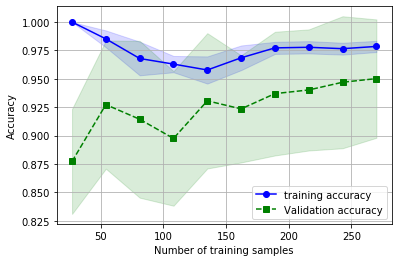

In [38]:
# Uploading volume both for normal and torsed
m = []
m.append('Vol_age')

feature_cols = ['Vol_age', 'label']
x_normal = normal[feature_cols]
x_torsed = torsion[feature_cols]

# Removing NAN:
x_normal = x_normal.dropna()
x_torsed = x_torsed.dropna()

#Concatinating variables

x = pd.concat([x_normal, x_torsed], ignore_index=True)

#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

# Train Decision Tree Classifer

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

fpr,tpr, thresholds = metrics.roc_curve(y_test, y_pred);
print("AUC:", metrics.auc(fpr,tpr))

scores = cross_val_score(clf, x_test,y_test, cv=10)
scores_1 = cross_val_score(clf, x_train,y_train, cv=10)


confusion = (metrics.confusion_matrix(y_test, y_pred))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sen = round(TP / float(FN + TP), 2)

spec = round(TN / (TN + FP), 2)


n = round(scores.mean(), 2), '+/-', round(scores.std(), 2)
n_1 = round(scores_1.mean(), 2), '+/-', round(scores_1.std(), 2)

auc_score = cross_val_score(clf, x_test, y_test, cv=10, scoring='roc_auc')
sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')

auc_mean = round(auc_score.mean(), 2), '+/-', round(auc_score.std(), 2)
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

m.append(n)
m.append(n_1)
m.append(auc_mean)
m.append(sens)
m.append(sen)
m.append(spec)
result.append(m)

train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 10)
train_mean= np.mean(train_scores, axis = 1)
train_std= np.std(train_scores, axis = 1)
test_mean= np.mean(test_scores, axis = 1)
test_std= np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean,color = 'blue', marker = 'o', label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker ='s', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

AUC: 0.9188311688311689
0.9447552447552446 0.8819799777530589


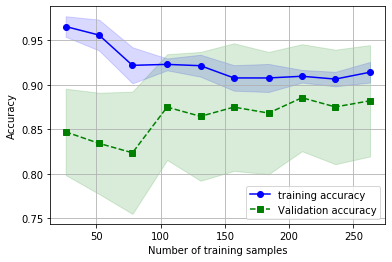

In [39]:
# Uploading volume both Ratio.
m = []
m.append('Ratio')

feature_cols = ['Ra', 'label']
x_free_normal = normal[feature_cols]
x_free_torsed = torsion[feature_cols]

# Removing NAN:
x_free_normal = x_free_normal.dropna()
x_free_torsed = x_free_torsed.dropna()

#Concatinating variables

x = pd.concat([x_free_normal, x_free_torsed], ignore_index=True)

#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state= 0)

# Train Decision Tree Classifer

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

fpr,tpr, thresholds = metrics.roc_curve(y_test, y_pred);
print("AUC:", metrics.auc(fpr,tpr))

scores = cross_val_score(clf, x_test,y_test, cv=10)
scores_1 = cross_val_score(clf, x_train,y_train, cv=10)


confusion = (metrics.confusion_matrix(y_test, y_pred))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sen = round(TP / float(FN + TP), 2)

spec = round(TN / (TN + FP), 2)


n = round(scores.mean(), 2), '+/-', round(scores.std(), 2)
n_1 = round(scores_1.mean(), 2), '+/-', round(scores_1.std(), 2)

auc_score = cross_val_score(clf, x_test, y_test, cv=10, scoring='roc_auc')
sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')

auc_mean = round(auc_score.mean(), 2), '+/-', round(auc_score.std(), 2)
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

m.append(n)
m.append(n_1)
m.append(auc_mean)
m.append(sens)
m.append(sen)
m.append(spec)
result.append(m)

train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 10)
train_mean= np.mean(train_scores, axis = 1)
train_std= np.std(train_scores, axis = 1)
test_mean= np.mean(test_scores, axis = 1)
test_std= np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean,color = 'blue', marker = 'o', label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker ='s', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
scores = cross_val_score(clf, x_test,y_test, cv=10)
scores_1= cross_val_score(clf, x_train,y_train, cv=10)
print(scores.mean(), scores_1.mean())

AUC: 0.994949494949495


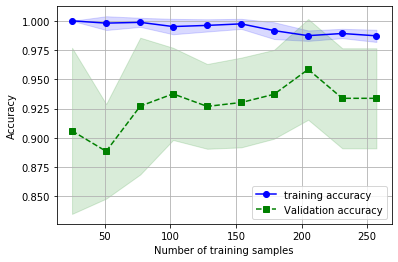

In [41]:
# All features

m = []
m.append('all_features')

feature_cols = ['Free_Fluid', 'Flow','Mass/cyst', 'Periph_follicles', 'Medialized', 'Vol', 'Vol_age', 'Ra', 'label']
x_free_normal = normal[feature_cols]
x_free_torsed = torsion[feature_cols]

# Removing NAN:
x_free_normal = x_free_normal.dropna()
x_free_torsed = x_free_torsed.dropna()

#Concatinating variables

x = pd.concat([x_free_normal, x_free_torsed], ignore_index=True)
x.to_excel('nom_data.xlsx', sheet_name='sheet1', index=False)

#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 0 )

# Train Decision Tree Classifer

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

fpr,tpr, thresholds = metrics.roc_curve(y_test, y_pred);
print("AUC:", metrics.auc(fpr,tpr))

scores = cross_val_score(clf, x_test,y_test, cv=10)
scores_1= cross_val_score(clf, x_train,y_train, cv=10)


confusion = (metrics.confusion_matrix(y_test, y_pred))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sen = round(TP / float(FN + TP), 2)

spec = round(TN / (TN + FP), 2)

n = round(scores.mean(), 2), '+/-', round(scores.std(), 2)
n_1 = round(scores_1.mean(), 2), '+/-', round(scores_1.std(), 2)

auc_score = cross_val_score(clf, x_test, y_test, cv=10, scoring='roc_auc')
sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')

auc_mean = round(auc_score.mean(), 2), '+/-', round(auc_score.std(), 2)
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

m.append(n)
m.append(n_1)
m.append(auc_mean)
m.append(sens)
m.append(sen)
m.append(spec)
result.append(m)

train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 10)
train_mean= np.mean(train_scores, axis = 1)
train_std= np.std(train_scores, axis = 1)
test_mean= np.mean(test_scores, axis = 1)
test_std= np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean,color = 'blue', marker = 'o', label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker ='s', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')


AUC: 0.9791666666666667


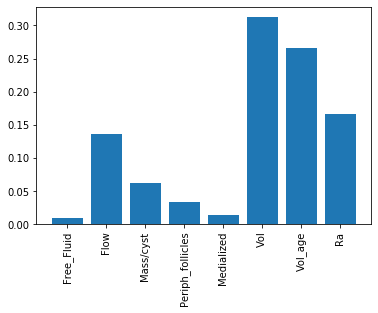

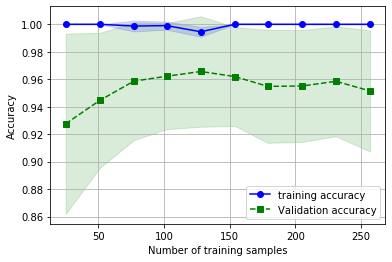

In [42]:
#Random tree classifier
m = []
m.append('random_trees')


feature_cols = ['Free_Fluid', 'Flow','Mass/cyst', 'Periph_follicles', 'Medialized', 'Vol', 'Vol_age', 'Ra', 'label']
rlf = RandomForestClassifier(n_estimators = 20, random_state=10)
x_free_normal = normal[feature_cols]
x_free_torsed = torsion[feature_cols]

# Removing NAN:
x_free_normal = x_free_normal.dropna()
x_free_torsed = x_free_torsed.dropna()

#Concatinating variables

x = pd.concat([x_free_normal, x_free_torsed], ignore_index=True)

#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

rlf.fit(x_train, y_train)

#Features importances with randomtreeclassifier
importances = rlf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_cols = feature_cols[:-1]

plt.bar(feature_cols, importances)
plt.xticks(rotation = 90)

y_pred = rlf.predict(x_test)

scores = cross_val_score(rlf, x_test,y_test, cv=10)
scores_1= cross_val_score(rlf, x_train,y_train, cv=10)
confusion = (metrics.confusion_matrix(y_test, y_pred))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sen = round(TP / float(FN + TP), 2)

spec = round(TN / (TN + FP), 2)


n = round(scores.mean(), 2), '+/-', round(scores.std(), 2)
n_1 = round(scores_1.mean(), 2), '+/-', round(scores_1.std(), 2)

auc_score = cross_val_score(clf, x_test, y_test, cv=10, scoring='roc_auc')
sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')

auc_mean = round(auc_score.mean(), 2), '+/-', round(auc_score.std(), 2)
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

m.append(n)
m.append(n_1)
m.append(auc_mean)
m.append(sens)
m.append(sen)
m.append(spec)
result.append(m)

train_sizes, train_scores, test_scores = learning_curve(rlf, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 10)
train_mean= np.mean(train_scores, axis = 1)
train_std= np.std(train_scores, axis = 1)
test_mean= np.mean(test_scores, axis = 1)
test_std= np.std(test_scores, axis = 1)

plt.figure()
plt.plot(train_sizes, train_mean,color = 'blue', marker = 'o', label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker ='s', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

fpr,tpr, thresholds = metrics.roc_curve(y_test, y_pred);
print("AUC:", metrics.auc(fpr,tpr))

AUC: 0.9298321136461472
0.9543040293040292 0.9619458128078817


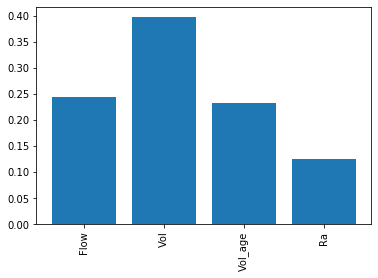

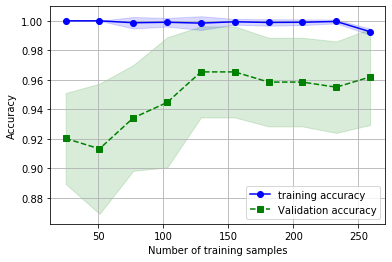

In [43]:
#Random tree classifier
m = []
m.append('important_features')


feature_cols = ['Flow','Vol', 'Vol_age', 'Ra', 'label']
rlf = RandomForestClassifier(n_estimators = 20, random_state=0)
x_free_normal = normal[feature_cols]
x_free_torsed = torsion[feature_cols]

# Removing NAN:
x_free_normal = x_free_normal.dropna()
x_free_torsed = x_free_torsed.dropna()

#Concatinating variables

x = pd.concat([x_free_normal, x_free_torsed], ignore_index=True)

#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

rlf.fit(x_train, y_train)

#Features importances with randomtreeclassifier
importances = rlf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_cols = feature_cols[:-1]

plt.bar(feature_cols, importances)
plt.xticks(rotation = 90)

y_pred = rlf.predict(x_test)

scores = cross_val_score(rlf, x_test,y_test, cv=10)
scores_1= cross_val_score(rlf, x_train,y_train, cv=10)
confusion = (metrics.confusion_matrix(y_test, y_pred))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

sen = round(TP / float(FN + TP), 2)

spec = round(TN / (TN + FP), 2)


n = round(scores.mean(), 2), '+/-', round(scores.std(), 2)
n_1 = round(scores_1.mean(), 2), '+/-', round(scores_1.std(), 2)

auc_score = cross_val_score(clf, x_test, y_test, cv=10, scoring='roc_auc')
sen_score = cross_val_score(clf, x_test, y_test, cv=10, scoring= 'recall')

auc_mean = round(auc_score.mean(), 2), '+/-', round(auc_score.std(), 2)
sens = round(sen_score.mean(), 2), '+/-', round(sen_score.std(), 2)

m.append(n)
m.append(n_1)
m.append(auc_mean)
m.append(sens)
m.append(sen)
m.append(spec)
result.append(m)

train_sizes, train_scores, test_scores = learning_curve(rlf, x_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 10)
train_mean= np.mean(train_scores, axis = 1)
train_std= np.std(train_scores, axis = 1)
test_mean= np.mean(test_scores, axis = 1)
test_std= np.std(test_scores, axis = 1)

plt.figure()
plt.plot(train_sizes, train_mean,color = 'blue', marker = 'o', label = 'training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker ='s', linestyle = '--', label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')

fpr,tpr, thresholds = metrics.roc_curve(y_test, y_pred);
print("AUC:", metrics.auc(fpr,tpr))

print(scores.mean(), scores_1.mean())

In [44]:
data= pd.DataFrame(result, columns = ['Parameter', 'Accuracy on testing', 'Accuracy on training', 'AUC',\
                                      'Sensitivity_CV10', 'Sensitivity', 'Specificity'])
data

,Parameter,Accuracy on testing,Accuracy on training,AUC,Sensitivity_CV10,Sensitivity,Specificity
0,Free_Fluid,"(0.76, +/-, 0.02)","(0.78, +/-, 0.01)","(0.53, +/-, 0.15)","(0.0, +/-, 0.0)",0.00,1.00
1,Flow,"(0.93, +/-, 0.07)","(0.93, +/-, 0.04)","(0.82, +/-, 0.18)","(0.65, +/-, 0.37)",0.67,0.99
2,Mass/cyst,"(0.84, +/-, 0.08)","(0.87, +/-, 0.05)","(0.77, +/-, 0.16)","(0.65, +/-, 0.3)",0.63,0.89
3,Periph_follicles,"(0.86, +/-, 0.08)","(0.86, +/-, 0.05)","(0.71, +/-, 0.14)","(0.43, +/-, 0.26)",0.45,0.99
4,Medialized,"(0.9, +/-, 0.07)","(0.9, +/-, 0.03)","(0.77, +/-, 0.15)","(0.57, +/-, 0.29)",0.59,0.98
5,Vol,"(0.91, +/-, 0.06)","(0.92, +/-, 0.03)","(0.94, +/-, 0.08)","(0.77, +/-, 0.25)",0.78,0.93
6,Vol_age,"(0.95, +/-, 0.05)","(0.95, +/-, 0.05)","(0.96, +/-, 0.05)","(0.97, +/-, 0.1)",0.85,0.96
7,Ratio,"(0.94, +/-, 0.05)","(0.88, +/-, 0.06)","(0.93, +/-, 0.08)","(0.92, +/-, 0.17)",0.93,0.91
8,all_features,"(0.99, +/-, 0.03)","(0.93, +/-, 0.04)","(0.98, +/-, 0.08)","(0.95, +/-, 0.15)",1.00,0.99
9,random_trees,"(0.98, +/-, 0.03)","(0.95, +/-, 0.04)","(0.98, +/-, 0.08)","(0.95, +/-, 0.15)",0.96,1.00


In [45]:
#Random tree classifier
m = []
m.append('random_trees')
feature_cols = ['Free_Fluid', 'Flow','Mass/cyst', 'Periph_follicles', 'Medialized', 'Vol', 'Vol_age', 'Ra', 'label']
rlf = RandomForestClassifier(n_estimators = 3, random_state=10)
x_free_normal = normal[feature_cols]
x_free_torsed = torsion[feature_cols]

# Removing NAN:
x_free_normal = x_free_normal.dropna()
x_free_torsed = x_free_torsed.dropna()

#Concatinating variables

x = pd.concat([x_free_normal, x_free_torsed], ignore_index=True)

#Cleaning the pandas dataframe

y = x['label']
del x['label']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0) 

#Features importances with randomtreeclassifier

w = np.arange(1, 100)
acc = []
for val in w:
    rlf = RandomForestClassifier(n_estimators = val, random_state=10)
    rlf.fit(x_train, y_train)
    y_pred=rlf.predict(x_test)
    acc.append((metrics.accuracy_score(y_test, y_pred)))

(0, 53)

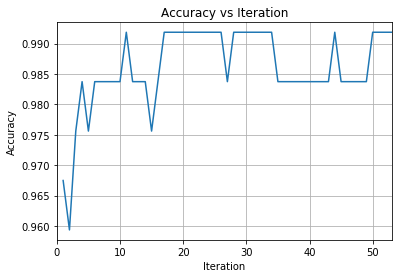

In [46]:
plt.plot(w, acc)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iteration')
plt.grid()
plt.xlim(0, 53)

## Other Machine Learning Algorithms

In [71]:
from sklearn.metrics import roc_auc_score
sv = svm.SVC()
sv.fit(x_train, y_train)
y_pred=sv.predict(x_test)
print("The accuracy is",metrics.accuracy_score(y_test, y_pred))
print("The AUC score is", roc_auc_score(y_test, y_pred))

The accuracy is 0.967479674796748
The AUC score is 0.9482323232323232


/Users/lesiyonr/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[1, 4, 9, 16]

<function list.count(value, /)>